In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt

# Load DataSet

In [9]:
df=pd.read_csv("IMDB Dataset.csv")

In [10]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [11]:
df.to_csv("IMDB_Dataset.tsv",sep='\t',index=False,)

In [12]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Basic Checks

In [13]:
df.head() #first 5 rows

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df.tail()#last 5 rows

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [21]:
# create a column to keep the count of the characters present in each record
df['Length']=df['review'].apply(len)

In [22]:
df['Length']

0        1761
1         998
2         926
3         748
4        1317
         ... 
49995    1008
49996     642
49997    1280
49998    1234
49999     678
Name: Length, Length: 50000, dtype: int64

In [23]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [25]:
# view the dataset with the column 'Length' which contains the number of characters present in each review
df.head(5)

,review,sentiment,Length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [28]:
## The sentiment are categorised into 2 classes i.e positive and negative
## let's see the count of each class
df.groupby('sentiment').count()

,review,Length
sentiment,,
negative,25000,25000
positive,25000,25000


# Data Visualization

# Label Distribution

<Axes: title={'center': 'Label Distribution'}, xlabel='sentiment'>

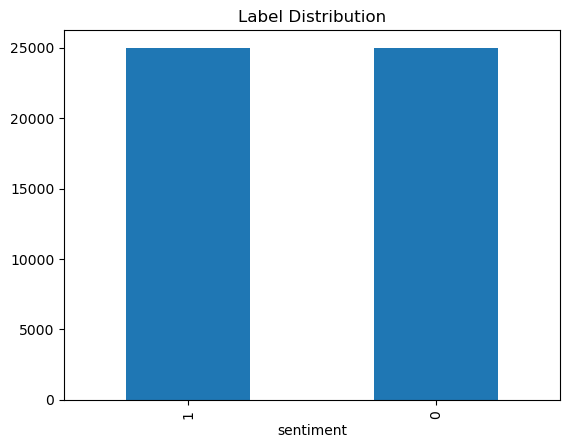

In [92]:
df['sentiment'].value_counts().plot(kind='bar', title="Label Distribution")

#Insights:
Should show 25,000 positive / 25,000 negative reviews.

Balanced class = good for binary classification.

# Review Length Analysis

Text(0.5, 0, 'Length of Review (characters)')

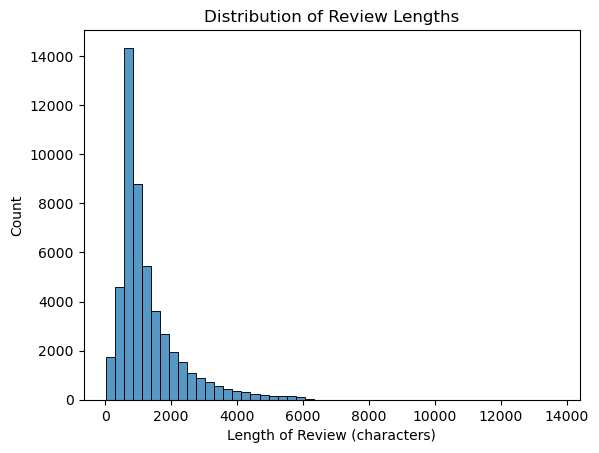

In [94]:
df['review_length'] = df['review'].apply(len)

# Plot distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Review (characters)")

#Insights:
Helps decide if you want to limit review length during text processing.

# Word Count Distribution

Text(0.5, 1.0, 'Distribution of Word Count per Review')

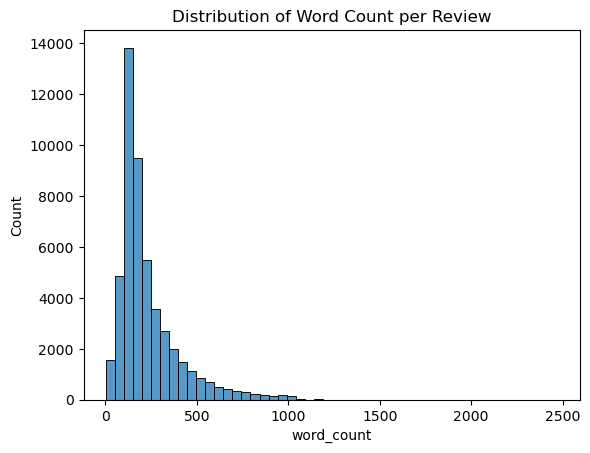

In [95]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=50)
plt.title("Distribution of Word Count per Review")


In [31]:
df['Length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: Length, dtype: float64

See what we found,A 13704 character long review.Let's use masking to find this review

In [33]:
df['Length']==13704

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: Length, Length: 50000, dtype: bool

In [35]:
# the review has the max characters
df[df['Length']==13704]['review']

31481    Match 1: Tag Team Table Match Bubba Ray and Sp...
Name: review, dtype: object

In [36]:
df[df['Length']==13704]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [37]:
# the review has the min characters
df[df['Length']==32]['review'].iloc[0]

'Read the book, forget the movie!'

# Text Pre-Processing 

In [39]:
# creating an object for the target values
dObject=df['sentiment'].values
dObject

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [40]:
# Lets assign ham as 1
df.loc[df['sentiment']=="positive","sentiment"] = 1

In [41]:
df.loc[df['sentiment']=="negative","sentiment"] = 0

In [44]:
dObject2=df['sentiment'].values
dObject2

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

In [45]:
df.head()

,review,sentiment,Length
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


First removing punctuation.We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [46]:
#the default list of punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
# Why is it important to remove punctuation?

"This review is positive" == "This review is positive."

False

# Remove Punctuation

In [49]:
# Let's remove the punctuation

def remove_punct(text):
    text="".join([char for char in text if char not in string .punctuation])
    return text

df['text_clean'] = df['review'].apply(lambda X: remove_punct(X))
    

Tokenization (process of converting the normal text strings in to a list of tokens(also known as lemmas)).

In [50]:
# original text and cleaned text
df.head()

,review,sentiment,Length,text_clean
0,One of the other reviewers has mentioned that ...,1,1761,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,998,A wonderful little production br br The filmin...
2,I thought this was a wonderful way to spend ti...,1,926,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,748,Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,Petter Matteis Love in the Time of Money is a ...


Now we need to convert each of those review into a vector the SciKit Learn's algorithm models can work with and machine learning model which we will gonig to use can understand.

In [51]:
# Countvectorizer is a method to convert text to numerical data. 
#Initialize the object for countvectorizer
CV=CountVectorizer(stop_words="english")

In [52]:
df

,review,sentiment,Length,text_clean
0,One of the other reviewers has mentioned that ...,1,1761,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,998,A wonderful little production br br The filmin...
2,I thought this was a wonderful way to spend ti...,1,926,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,748,Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,Petter Matteis Love in the Time of Money is a ...
...,...,...,...,...
49995,I thought this movie did a down right good job...,1,1008,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,642,Bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,1280,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,0,1234,Im going to have to disagree with the previous...


In [54]:
# Splitting x and y

xSet = df['text_clean'].values
ySet = df['sentiment'].values
ySet

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

In [55]:
# Datatype for y is object. lets convert it into int
ySet = ySet.astype('int')
ySet

array([1, 1, 1, ..., 0, 0, 0])

In [57]:
xSet

array(['One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt 

# Splitting Train and Test Data

In [58]:
xSet_train,xSet_test,ySet_train,ySet_test=train_test_split(xSet,ySet,test_size=0.2,random_state=10)

In [60]:
xSet_train_CV = CV.fit_transform(xSet_train)
xSet_train_CV

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3597744 stored elements and shape (40000, 158445)>

In [61]:
type(xSet_train_CV)

scipy.sparse._csr.csr_matrix

# Training a model

In [62]:
# Initialising the model
NB = MultinomialNB()

In [65]:
NB.fit(xSet_train_CV,ySet_train)

MultinomialNB()

In [66]:
# Let's test CV on our test data
xSet_test_CV=CV.transform(xSet_test)

In [69]:
# prediction for xSet_test_CV
ySet_predict = NB.predict(xSet_test_CV)

In [70]:
ySet_predict

array([1, 0, 0, ..., 0, 0, 1])

In [71]:
# Checking accuracy

accuracyScore = accuracy_score(ySet_test,ySet_predict)

print("Prediction Accuracy :",accuracyScore)

Prediction Accuracy : 0.8597


#                IT Gives Accuracy 85%

# TF-IDF

In [73]:
# Splitting x and y

X = df['text_clean'].values
y = df['sentiment'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

In [74]:
# Datatype for y is object. lets convert it into int
y = y.astype('int')
y

array([1, 1, 1, ..., 0, 0, 0])

In [75]:
type(X)

numpy.ndarray

In [77]:
## text preprocessing and feature vectorizer
# To extract features from a document of words, we import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(X)

In [78]:
df.sentiment.value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6)

In [83]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

In [86]:
from sklearn.metrics import accuracy_score, classification_report

In [87]:
y_pred = model.predict(X_test_tfidf)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88544

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6289
           1       0.87      0.90      0.89      6211

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



# It gives Accuracy 89%